# DSCI 100: Group Project

## Classification of Facebook Post Type Ysing Social Media Performance Metrics

#### Introduction:

The rapid change of technology has greatly transformed the business world. Social media platforms have become the best place for businesses to advertise their brands through customer engagement. 
Our study focuses on the biggest social network worldwide, Facebook, with over 2.7 billion monthly active users ((Statista, 2021). 

The dataset *Facebook performance metrics* (Moro et al., 2016) contains data related to posts published throughout the year 2014 on a renowned cosmetics brand's Facebook page. Post information such as type (photo, status, link, or video), time posted (month, day of week, and hour), user engagement (comments, likes, and shares), impressions on each post (too many columns to list here), and whether the post was paid or unpaid is included in the dataset. This project proposes to use all relevant columns from this dataset to determine the type of a brand's Facebook post. We will determine which of these metrics are relivant in our cleaning and exploration of the data.

TODO: (from prop feedback) Please provide some background info, so that someone unfamiliar with it will be prepared to understand the rest of your proposal.


# TODO: EXPLICITELY STATE OUR RESEARCH QUESTION HERE!!!
**from proposal feedback, Please state your proposal question clearly and in a form of a "predictive question"**
Our study focuses on predicting post type given 

#### Preliminary exploratory data analysis:

We begin by loading the relevant libraries.

In [1]:
# Load libraries for preliminary data analysis:
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

The following cell loads the dataset into R; as the dataset on the web is contained in a zip folder, the .csv file was manually extracted and pushed to the working Github repository.

The dataset is already in tidy format. The column headings were made more usable by removing spaces and shortening longer headings.

In [2]:
# displays first and last 8 rows of the dataset
options(repr.matrix.max.rows = 16)
# Set the seed
set.seed(123)

# Load the data in
fb_data_raw <- read_csv2("https://gist.githubusercontent.com/KolCrooks/691e5890b6747b4777d6032f019b2c0f/raw/20629a5da3d5a7683e3071798876f3e4b204fbbb/fb_data.csv",  col_types = cols())

fb_data_raw

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.



Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186
139441,Photo,3,12,1,3,1,11692,19479,481,265,364,15432,9328,379,3,249,27,279
139441,Photo,3,12,7,9,1,13720,24137,537,232,305,19728,11056,422,0,325,14,339
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [3]:
# Na Rows:
sum(is.na(fb_data_raw))

[1] 6

# TODO: EXPLAIN WHY WE CONVERT COMMENT LIKE AND SHARE TO PERCENTS
Since we are going to be working with type, category, post month, post_weekday, and post hours as a categorical statistical variables, 
we are converting them to factors using the function `as_factor`. In addition, we realized that we had 6 NAs in our data set, so we are using `na.omit` function to remove all the NAs

In [4]:
# Clean the data:
fb_data_clean_cols <- fb_data_raw
colnames(fb_data_clean_cols) <- c("page_likes", "type", "category", "post_month", "post_weekday", "post_hour", "paid", "reach", 
      "impressions", "engaged_users", "post_consumers", "post_consumptions", "impressions_by_people_that_liked_page", 
      "reach_by_people_that_like_page", "people_liked_and_engaged", "comments", "likes", "shares", "interactions")
fb_data_clean <- fb_data_clean_cols %>% 
        mutate(type = as_factor(type)) %>% 
        mutate(category = as_factor(category)) %>% 
        mutate(post_month = as_factor(post_month)) %>% 
        mutate(post_weekday = as_factor(post_weekday)) %>% 
        mutate(post_hour = as_factor(post_hour)) %>% 
        na.omit()

fb_data_clean

page_likes,type,category,post_month,post_weekday,post_hour,paid,reach,impressions,engaged_users,post_consumers,post_consumptions,impressions_by_people_that_liked_page,reach_by_people_that_like_page,people_liked_and_engaged,comments,likes,shares,interactions
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186
139441,Photo,3,12,1,3,1,11692,19479,481,265,364,15432,9328,379,3,249,27,279
139441,Photo,3,12,7,9,1,13720,24137,537,232,305,19728,11056,422,0,325,14,339
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [5]:
# checking if all NAs are removed
#Na Rows:
sum(is.na(fb_data_clean))

[1] 0

# TODO: EXPLAIN WHY THE STRATA IS "TYPE"
# TODO: EXPLAIN WHY WE CHOSE 75%
**"Why have you decided to use 75% of the dataset as the training data?"**
<p> Here we are splitting our data into training and testing sets using `initial_split`. In order to get a more accurate calculation of our model performance, we choose to use a larger training data of 75% while keeping the remaining 25% for testing. As we want to classify facebook post type, we pass `type` to `strata` argument in initial splitting 

In [6]:
# Split the data:
fb_split <- initial_split(fb_data_clean, prop = 0.5, strata = type)
fb_train <- training(fb_split)
fb_test <- testing(fb_split)

fb_train

page_likes,type,category,post_month,post_weekday,post_hour,paid,reach,impressions,engaged_users,post_consumers,post_consumptions,impressions_by_people_that_liked_page,reach_by_people_that_like_page,people_liked_and_engaged,comments,likes,shares,interactions
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186
139441,Photo,3,12,7,9,1,13720,24137,537,232,305,19728,11056,422,0,325,14,339
139441,Status,2,12,7,3,0,11844,22538,1530,1407,1692,15220,7912,1250,0,161,31,192
139441,Photo,2,12,5,10,0,3112,5590,208,127,145,3887,2174,165,0,88,18,106
139441,Photo,2,12,5,3,0,2549,4896,249,134,168,3631,1917,183,5,137,10,152
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


## TODO: include Plot title!
**The plot does not include a title. For the report, please make sure you are labelling your tables and plots.**

## Selecting our predictors

To figure out which predictors we want to use, we will use `ggpairs` to determine how well each column can predict post type. To do this we will look at how different each post type's box plot is when compared with the predictor.  Before looking at the ggpairs plot, we want to take out the columns that we know wouldn't work. This is because we don't need ggpairs to know that they wouldn't work, and it would help to reduce clutter in the plot while allowing us to better look at the remaing predictors.


The main predictors that we know we can't use are coulmns with factors. This includes the time based columns `post_month`, `post_weekday`, and `post_hour`, and also `category`.

In [58]:
# Columns before selection
colnames(fb_data_clean)

colnames(fb_test)

[1] "page_likes"                           
 [2] "type"                                 
 [3] "category"                             
 [4] "post_month"                           
 [5] "post_weekday"                         
 [6] "post_hour"                            
 [7] "paid"                                 
 [8] "reach"                                
 [9] "impressions"                          
[10] "engaged_users"                        
[11] "post_consumers"                       
[12] "post_consumptions"                    
[13] "impressions_by_people_that_liked_page"
[14] "reach_by_people_that_like_page"       
[15] "people_liked_and_engaged"             
[16] "comments"                             
[17] "likes"                                
[18] "shares"                               
[19] "interactions"

[1] "page_likes"                           
 [2] "type"                                 
 [3] "category"                             
 [4] "post_month"                           
 [5] "post_weekday"                         
 [6] "post_hour"                            
 [7] "paid"                                 
 [8] "reach"                                
 [9] "impressions"                          
[10] "engaged_users"                        
[11] "post_consumers"                       
[12] "post_consumptions"                    
[13] "impressions_by_people_that_liked_page"
[14] "reach_by_people_that_like_page"       
[15] "people_liked_and_engaged"             
[16] "comments"                             
[17] "likes"                                
[18] "shares"                               
[19] "interactions"

In [61]:
fb_data_selected1 <- fb_train %>% 
            select(-post_month, -post_weekday, -post_hour, -category) %>%
            select(type, page_likes, paid:interactions) # reorder the df so that type is first, so that we can display only that row
fb_data_selected1

fb_test_selected1 <- fb_test %>% 
            select(-post_month, -post_weekday, -post_hour, -category) %>%
            select(type, page_likes, paid:interactions) # reorder the df so that type is first, so that we can display only that row
fb_test_selected1

#         mutate(comment_percent = comments / interactions) %>% 
#         mutate(like_percent = likes / interactions) %>% 
#         mutate(share_percent = shares / interactions) %>% 

type,page_likes,paid,reach,impressions,engaged_users,post_consumers,post_consumptions,impressions_by_people_that_liked_page,reach_by_people_that_like_page,people_liked_and_engaged,comments,likes,shares,interactions
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Photo,139441,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
Status,139441,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
Photo,139441,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
Status,139441,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186
Photo,139441,1,13720,24137,537,232,305,19728,11056,422,0,325,14,339
Status,139441,0,11844,22538,1530,1407,1692,15220,7912,1250,0,161,31,192
Photo,139441,0,3112,5590,208,127,145,3887,2174,165,0,88,18,106
Photo,139441,0,2549,4896,249,134,168,3631,1917,183,5,137,10,152
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


type,page_likes,paid,reach,impressions,engaged_users,post_consumers,post_consumptions,impressions_by_people_that_liked_page,reach_by_people_that_like_page,people_liked_and_engaged,comments,likes,shares,interactions
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Photo,139441,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
Photo,139441,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
Photo,139441,1,11692,19479,481,265,364,15432,9328,379,3,249,27,279
Photo,139441,0,4694,8668,280,183,250,4309,2324,199,3,113,26,142
Status,139441,0,21744,42334,4258,4100,4540,37849,18952,3798,0,233,19,252
Photo,139441,0,2847,5133,193,115,133,3779,2072,152,0,90,14,104
Status,138414,0,10060,19680,1264,1209,1425,17272,8548,1162,4,86,18,108
Photo,138414,0,1591,2825,121,88,111,2116,1161,100,0,34,8,42
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 14
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

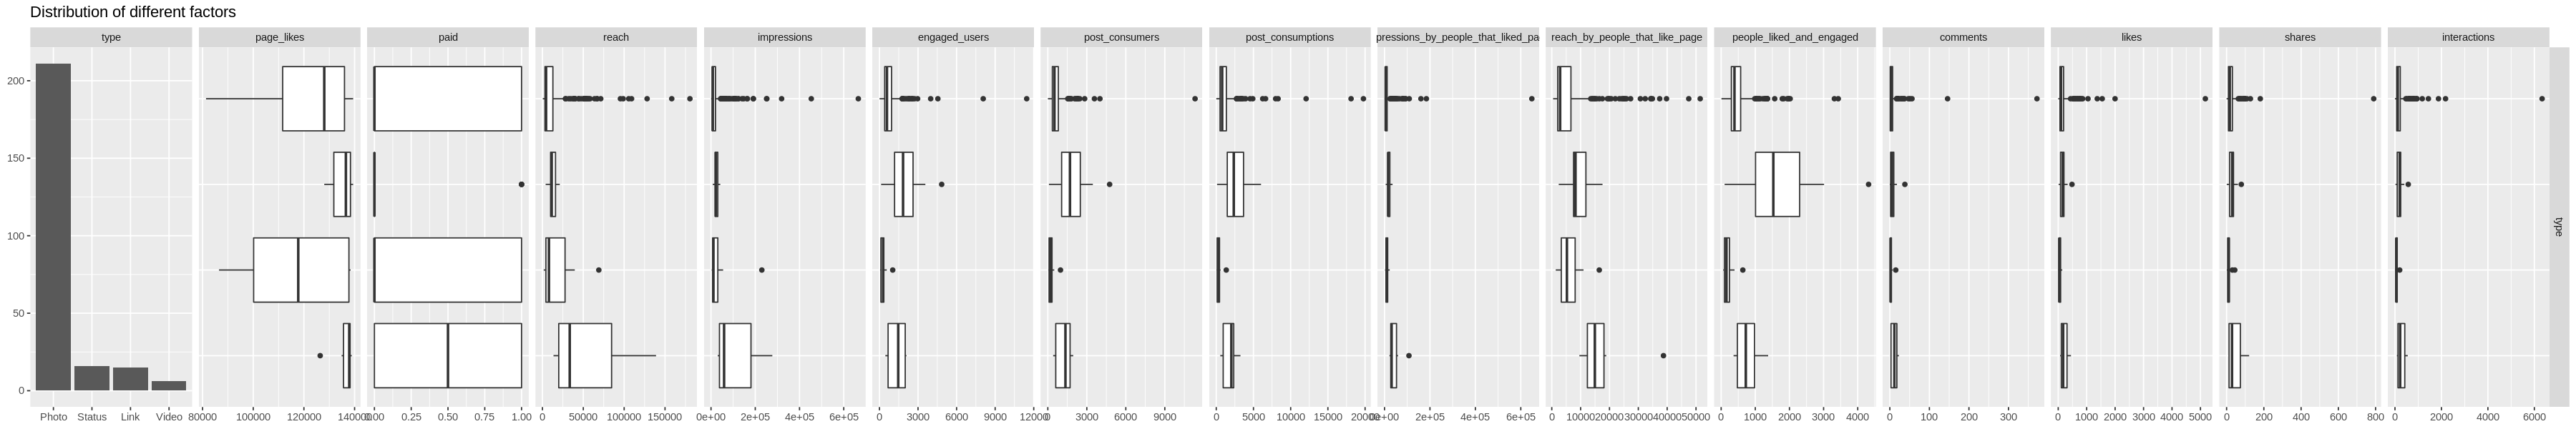

In [62]:
options(repr.plot.height = 5, repr.plot.width = 30)
fb_select_plot <- fb_data_selected1 %>% 
    ggpairs() +
    ggtitle("Distribution of different factors")
    theme(text = element_text(size=14))

# Select just the top row because it is the only thing that we are trt
fb_select_plot$nrow <- 1
fb_select_plot$yAxisLabels <- fb_select_plot$yAxisLabels[1]
fb_select_plot

Looking at this plot, it might be better to say which predictors wouldn't be good classifiers for our prediction:
- `impressions` will not a great classifier because the difference in most columns look the same, meaning there is less variation in the data. While the video boxplot does look different from the rest, the outliers from other ones also occupy similar space.
- `impressions_by_people_that_liked_page` looks very bad with each box plot looking like just a line.
- `comments`, `likes`, `shares`, and `interactions` look like they have similar problems as `impressions`.

We think that some of these might actually be promissing but the scale is so small that it is hard to see any differences. Something we can do is scale a predictor based on another one.

With `comments`, `likes`, `shares`, and `interactions`, all of these are related in that `interactions` is the sum of the `comments`, `likes`, and `shares` on each post. We can turn these into ratios by turing `comments`, `likes`, and `shares`, into percentages of the total interactions. These are better than the raw values because the raw values are a measure of the popularity of the page, and not characteristics of the post type. This will normalize the data, allowing for the model to be effective in classifying posts for any page size. 

# Talk about why the columns we picked are good

# MAYBE LOOK INTO `impressions` AND `impressions_by_people_that_liked_page`

In [63]:
fb_data_selected2 <- fb_data_selected1 %>% 
            select(-impressions, -impressions_by_people_that_liked_page) %>% 
            mutate(comment_percent = comments / interactions) %>% 
            mutate(like_percent = likes / interactions) %>% 
            mutate(share_percent = shares / interactions) %>% 
            mutate(engagement_ratio = interactions / reach) %>% 
            select(-comments, -likes, -shares, -interactions) # We don't need these anymore because they have been scaled
fb_data_selected2

fb_test_selected2 <- fb_test_selected1 %>% 
            select(-impressions, -impressions_by_people_that_liked_page) %>% 
            mutate(comment_percent = comments / interactions) %>% 
            mutate(like_percent = likes / interactions) %>% 
            mutate(share_percent = shares / interactions) %>% 
            mutate(engagement_ratio = interactions / reach) %>% 
            select(-comments, -likes, -shares, -interactions) # We don't need these anymore because they have been scaled

fb_test_selected2

type,page_likes,paid,reach,engaged_users,post_consumers,post_consumptions,reach_by_people_that_like_page,people_liked_and_engaged,comment_percent,like_percent,share_percent,engagement_ratio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Photo,139441,0,2752,178,109,159,1640,119,0.040000000,0.7900000,0.17000000,0.03633721
Status,139441,0,10460,1457,1361,1674,6112,1108,0.030487805,0.7926829,0.17682927,0.01567878
Photo,139441,0,2413,177,113,154,1503,132,0.000000000,0.8250000,0.17500000,0.03315375
Status,139441,0,10472,1191,1073,1389,7852,1016,0.005376344,0.8172043,0.17741935,0.01776165
Photo,139441,1,13720,537,232,305,11056,422,0.000000000,0.9587021,0.04129794,0.02470845
Status,139441,0,11844,1530,1407,1692,7912,1250,0.000000000,0.8385417,0.16145833,0.01621074
Photo,139441,0,3112,208,127,145,2174,165,0.000000000,0.8301887,0.16981132,0.03406170
Photo,139441,0,2549,249,134,168,1917,183,0.032894737,0.9013158,0.06578947,0.05963123
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


type,page_likes,paid,reach,engaged_users,post_consumers,post_consumptions,reach_by_people_that_like_page,people_liked_and_engaged,comment_percent,like_percent,share_percent,engagement_ratio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Photo,139441,1,50128,2211,790,1119,32048,1386,0.03263928,0.8846370,0.08272369,0.03544925
Photo,139441,0,7244,671,410,580,3200,396,0.04834606,0.8269720,0.12468193,0.05425179
Photo,139441,1,11692,481,265,364,9328,379,0.01075269,0.8924731,0.09677419,0.02386247
Photo,139441,0,4694,280,183,250,2324,199,0.02112676,0.7957746,0.18309859,0.03025138
Status,139441,0,21744,4258,4100,4540,18952,3798,0.00000000,0.9246032,0.07539683,0.01158940
Photo,139441,0,2847,193,115,133,2072,152,0.00000000,0.8653846,0.13461538,0.03652968
Status,138414,0,10060,1264,1209,1425,8548,1162,0.03703704,0.7962963,0.16666667,0.01073559
Photo,138414,0,1591,121,88,111,1161,100,0.00000000,0.8095238,0.19047619,0.02639849
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 14
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


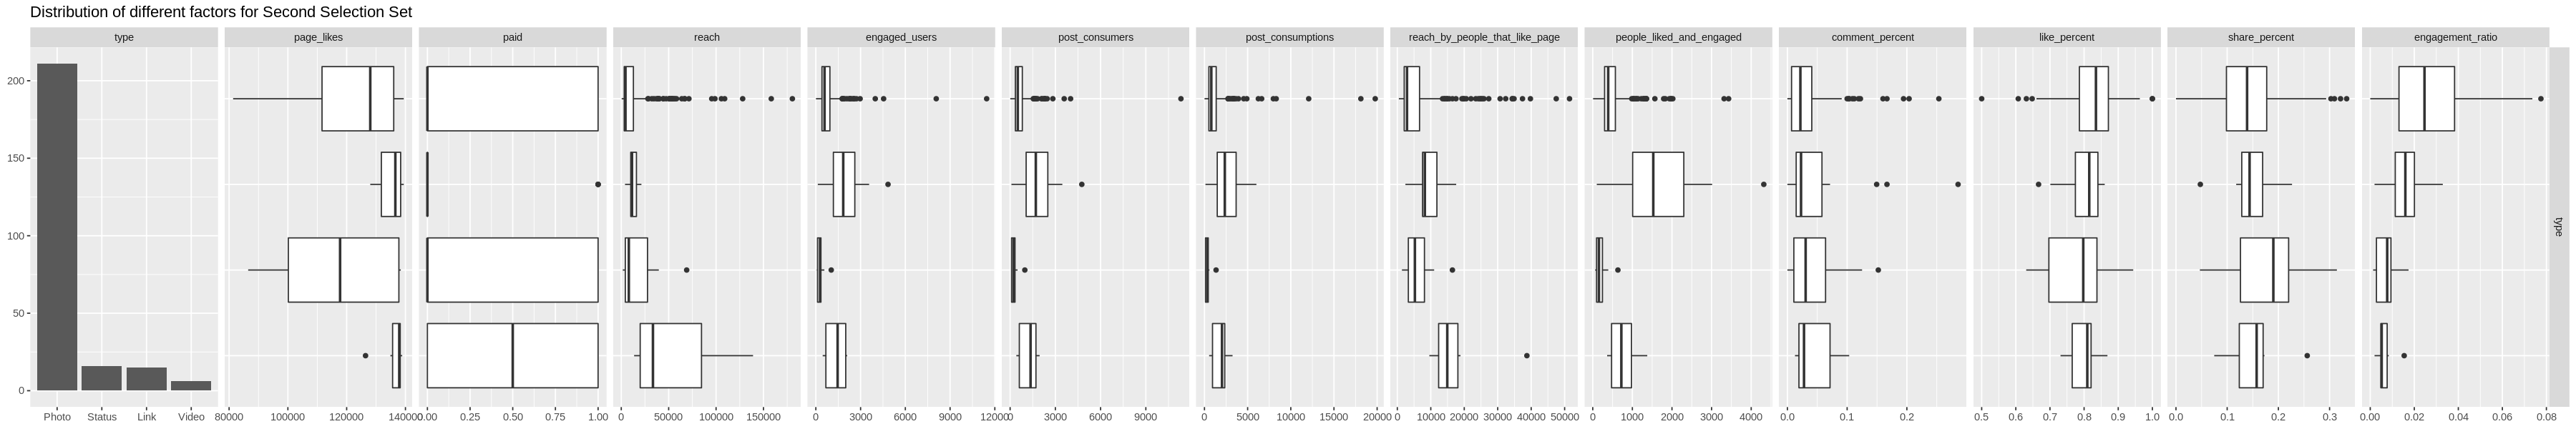

In [64]:
options(repr.plot.height = 5, repr.plot.width = 30)
fb_select_plot2 <- fb_data_selected2 %>% 
    ggpairs() +
    ggtitle("Distribution of different factors for Second Selection Set")
    theme(text = element_text(size=14))

# Select just the top row because it is the only thing that we are trt
fb_select_plot2$nrow <- 1
fb_select_plot2$yAxisLabels <- fb_select_plot2$yAxisLabels[1]
fb_select_plot2

`comment_percent`, `like_percent`, and `share_percent` look very different now. `comment_percent` still does not look like it would be good, but `like_percent`, and `share_percent` seem like they could be good as the variance for each box plot looks different enough where you can tell them apart.

In [89]:
fb_data_selected <- fb_data_selected2 %>% 
            select(-comment_percent)
fb_data_selected

fb_test_selected <- fb_test_selected2 %>% 
            select(-comment_percent)

type,page_likes,paid,reach,engaged_users,post_consumers,post_consumptions,reach_by_people_that_like_page,people_liked_and_engaged,like_percent,share_percent,engagement_ratio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Photo,139441,0,2752,178,109,159,1640,119,0.7900000,0.17000000,0.03633721
Status,139441,0,10460,1457,1361,1674,6112,1108,0.7926829,0.17682927,0.01567878
Photo,139441,0,2413,177,113,154,1503,132,0.8250000,0.17500000,0.03315375
Status,139441,0,10472,1191,1073,1389,7852,1016,0.8172043,0.17741935,0.01776165
Photo,139441,1,13720,537,232,305,11056,422,0.9587021,0.04129794,0.02470845
Status,139441,0,11844,1530,1407,1692,7912,1250,0.8385417,0.16145833,0.01621074
Photo,139441,0,3112,208,127,145,2174,165,0.8301887,0.16981132,0.03406170
Photo,139441,0,2549,249,134,168,1917,183,0.9013158,0.06578947,0.05963123
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


Something else we want to think about is there any hidden predictors that we can get from combining other predictors? 
# Should we include this part?
When doing some research on this dataset, we found that some people created a engagement ratio factor that is `interactions` / `reach`. When we ggpairs this with type, we get this:

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 14
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

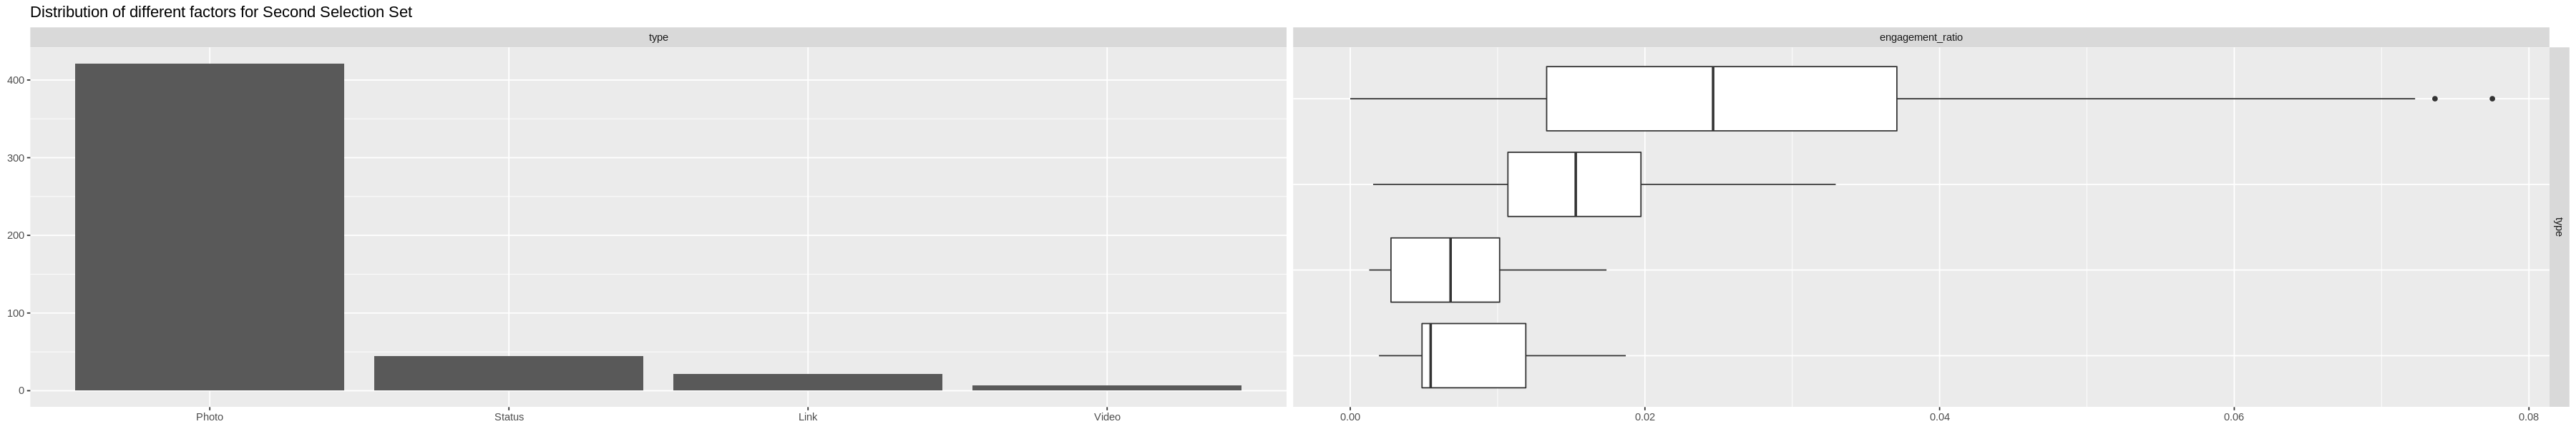

In [66]:
fb_select_plot3 <- fb_data_clean %>%
    mutate(engagement_ratio = interactions / reach) %>% 
    select(type, engagement_ratio) %>% 
    ggpairs() +
    ggtitle("Distribution of different factors for Second Selection Set")
    theme(text = element_text(size=14))

# Select just the top row because it is the only thing that we are trt
fb_select_plot3$nrow <- 1
fb_select_plot3$yAxisLabels <- fb_select_plot$yAxisLabels[1]
fb_select_plot3

This looks promising so we will add this as a factor that we want to look at


### Preliminary Summary Tables:

Tables were constructed to gain an initial summary of the data. Table *summary_table1* groups posts by type and computes the total posts, total interactions (including all likes, comments, shares), maximum interactions, and number of paid posts for each type.

In [67]:
summary_table1 = fb_train %>% 
    group_by(type) %>%
    summarize(total_of_type = n())

summary_table1

`summarise()` ungrouping output (override with `.groups` argument)



type,total_of_type
<fct>,<int>
Photo,211
Status,16
Link,15
Video,6


Looking at the number of different posts, it is clear that we need to upsample the data. This does raise some concerns about how well it will be able to predict some types (mainly the type `video`), but we are confident that we can still get good results.

#### Selected Columns:

In [70]:
selected_cols <- (colnames(fb_data_selected))
selected_cols

colnames(fb_test_selected)

[1] "type"                           "page_likes"                    
 [3] "paid"                           "reach"                         
 [5] "engaged_users"                  "post_consumers"                
 [7] "post_consumptions"              "reach_by_people_that_like_page"
 [9] "people_liked_and_engaged"       "like_percent"                  
[11] "share_percent"                  "engagement_ratio"

[1] "type"                           "page_likes"                    
 [3] "paid"                           "reach"                         
 [5] "engaged_users"                  "post_consumers"                
 [7] "post_consumptions"              "reach_by_people_that_like_page"
 [9] "people_liked_and_engaged"       "like_percent"                  
[11] "share_percent"                  "engagement_ratio"

### Preliminary visualizations:

# TODO: should we create visualizations? I think the ggpairs exploration should be enough but who knows. - Kol

#### Methods:

Our analysis will use the following input columns of the original dataset: type `page_likes`, `paid`, `reach`, `engaged_users`, `post_consumers`, `post_consumptions`, `reach_by_people_that_like_page`, and `people_liked_and_engaged`. We will also be using the generated columns `comment_percent`, `like_percent`, `share_percent`, and `engagement_ratio`.


Our aim is to use the K-nearest neighbours algorithm to generate a classification model which will classify a post by type (photo, status, link, or video).

To visualize our results, we plan to use a confusion matrix. This will display how often our classification model labels a post correctly, and how often each label gets confused with another. We will also use bar charts to visualize relevant and intermediate results; e.g., we will create a bar chart with post type on the x-axis and interactions on the y-axis, filling out the bars with proportional values of the type of each interaction. As part of the tuning step of creating the model, we can create a line chart to show us the optimal K value. 

#### Expected outcomes and significance:

This analysis hopes to define a relationship between type of post (i.e., photo, status, link, or video) and ratio of the corresponding post’s interaction type. It is expected that videos and photos, for example, may have higher percentages of interactions that are comments and/or likes when compared to a link or status.

This classification application for labeling a post’s type could be helpful in identifying the types of reactions that a post might receive. It is possible that we find images get the most likes, while statuses get the most comments. Knowing how these metrics indicate the type could lead to better targeted ad campaigns that look for a certain type of user engagement.

Future questions following from this analysis may include:
- Do paid posts generate more traffic than unpaid posts?
- Does the category of a post (i.e., “action”, “product”, or “inspiration” classification) affect the overall and/or ratio of interactions on a post?
- Do posts with more interactions overall correlate with increases in users liking a company’s Facebook page? 

In examining the data for classification, it is also expected that trends may emerge which could in the future be used to predict post engagement. This predictive knowledge could be used by companies looking to grow their social media reach, as they may more accurately tailor their posts to yield higher engagement before publishing.

## Create the model

In [71]:
upsample_recipe <- recipe(type ~ ., data = fb_data_selected) %>% 
                    step_upsample(type, over_ratio = 1, skip = FALSE ) %>% 
                    prep()



fb_data_upsampled <- upsample_recipe %>% bake(fb_data_selected)
fb_data_upsampled


page_likes,paid,reach,engaged_users,post_consumers,post_consumptions,reach_by_people_that_like_page,people_liked_and_engaged,like_percent,share_percent,engagement_ratio,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
139441,0,2752,178,109,159,1640,119,0.7900000,0.17000000,0.03633721,Photo
139441,0,2413,177,113,154,1503,132,0.8250000,0.17500000,0.03315375,Photo
139441,1,13720,537,232,305,11056,422,0.9587021,0.04129794,0.02470845,Photo
139441,0,3112,208,127,145,2174,165,0.8301887,0.16981132,0.03406170,Photo
139441,0,2549,249,134,168,1917,183,0.9013158,0.06578947,0.05963123,Photo
138414,1,22784,887,337,417,19312,684,0.9632721,0.03338898,0.02629038,Photo
138414,0,1722,163,123,148,1050,123,0.7407407,0.22222222,0.03135889,Photo
138414,1,53264,1706,1103,1655,39776,1307,0.9509116,0.02805049,0.01338615,Photo
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [72]:
# Create the tune spec
knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
            set_engine("kknn") %>% 
            set_mode("classification")

In [73]:
# Create the recipe
fb_recipe <- recipe(type ~  # page_likes +
#                             paid +
#                             reach +
#                             engaged_users +
#                             post_consumers +
#                             post_consumptions +
#                             reach_by_people_that_like_page +
#                             people_liked_and_engaged 
#                             likes +
#                             shares +
#                             interactions
                            like_percent +
                            share_percent +
                            paid +
                            engagement_ratio
                    , data = fb_data_upsampled) %>%
#                 step_mutate(likes = likes / interactions,
#                             share_percent = shares / interactions) %>%  #,
#                             engagement_ratio = interactions / reach) %>%
#                 step_upsample(type, over_ratio = 1, skip = FALSE) %>%
                step_scale(all_predictors()) %>% 
                step_center(all_predictors()) %>% 
                prep()

fb_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Training data contained 844 data points and 2 incomplete rows. 

Operations:

Scaling for like_percent, share_percent, ... [trained]
Centering for like_percent, share_percent, ... [trained]

## Show that we are using the correct columns

In [74]:
baked_fb <- bake(fb_recipe, fb_data_upsampled)
baked_fb

like_percent,share_percent,paid,engagement_ratio,type
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.1573902,0.2191052,-0.7041773,1.66471878,Photo
0.3250847,0.2989790,-0.7041773,1.42023108,Photo
2.1681673,-1.8368797,1.4184143,0.77163749,Photo
0.3966106,0.2160911,-0.7041773,1.48996079,Photo
1.3770976,-1.4456332,-0.7041773,3.45368527,Photo
2.2311655,-1.9632233,1.4184143,0.89312833,Photo
-0.8364289,1.0533428,-0.7041773,1.28238650,Photo
2.0607763,-2.0485045,1.4184143,-0.09790849,Photo
⋮,⋮,⋮,⋮,⋮


## Show that data has been upsampled and balanced

In [75]:
baked_fb %>% 
    group_by(type) %>% 
    summarize(n = n())

`summarise()` ungrouping output (override with `.groups` argument)



type,n
<fct>,<int>
Photo,211
Status,211
Link,211
Video,211


## Tune the model:

# Why does output have neighbors 1..15 where it skips some?

In [76]:
# Create vfolds with v
fb_vfold <- vfold_cv(baked_fb, v = 10, strata = type)


In [77]:
gridvals = tibble(neighbors = 1:20)

fb_fit <- workflow() %>% 
        add_recipe(fb_recipe) %>% 
        add_model(knn_spec_tune) %>% 
        tune_grid(resamples = fb_vfold, grid = gridvals) %>% 
        collect_metrics()

fb_fit

x Fold02: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold10: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9630682,8,0.006858303,Model01
1,roc_auc,hand_till,0.9753788,8,0.004572202,Model01
2,accuracy,multiclass,0.9630682,8,0.006858303,Model02
2,roc_auc,hand_till,0.9753788,8,0.004572202,Model02
3,accuracy,multiclass,0.9364177,8,0.005418015,Model03
3,roc_auc,hand_till,0.9752281,8,0.004601336,Model03
4,accuracy,multiclass,0.9364177,8,0.005418015,Model04
4,roc_auc,hand_till,0.9760042,8,0.004264775,Model04
⋮,⋮,⋮,⋮,⋮,⋮,⋮


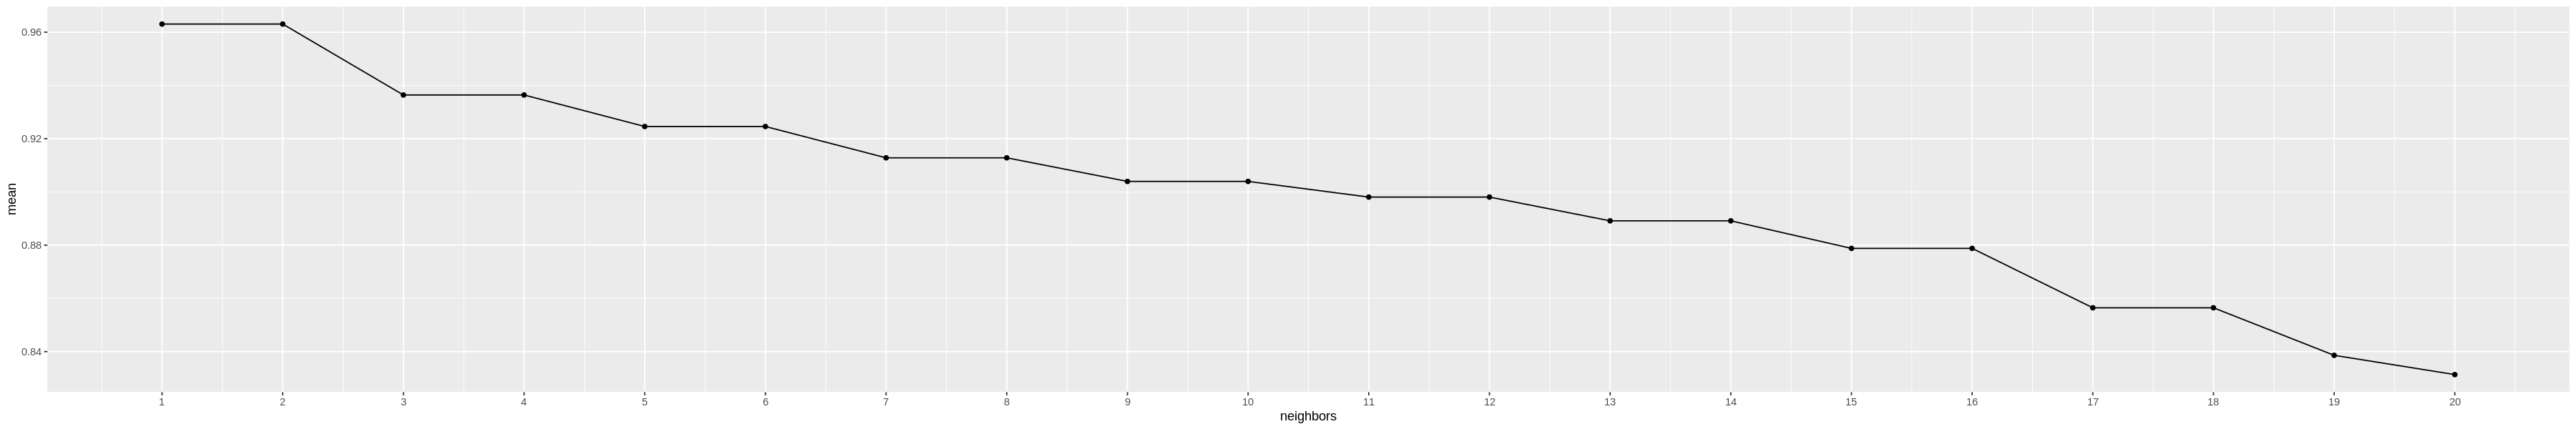

In [78]:
fb_filtered <- fb_fit %>% filter(.metric == "accuracy")

fb_filtered %>% ggplot(aes(x = neighbors, y = mean)) +
            geom_point() +
            geom_line() +
            scale_x_continuous(breaks = 1:20)

In [79]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_fit <- workflow() %>%
  add_recipe(fb_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = baked_fb)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~2, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.02969121
Best kernel: rectangular
Best k: 2

In [87]:
fb_test_predictions <- predict(knn_fit, fb_test_selected) %>%
  bind_cols(fb_test_selected)
fb_test_predictions

fb_test_selected

ERROR: Error: Can't recycle `..1` (size 244) to match `..2` (size 247).


In [26]:
fb_test_predictions %>%
  metrics(truth = type, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.13765182
kap,multiclass,-0.08161839


### References: 
Statista. (2021). Facebook: Monthly Active Users 2021. Retrieved on February 28, 2021 from http://www.statista.com.ezproxy.library.ubc.ca/statistics/264810/number-of-monthly-active-facebook-users-worldwide/
